In [29]:
import pandas as pd
from utils.onboard_ai_util import determine_sentiment, analyze_feedback
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
determine_sentiment('it was not helpful info')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/barak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


'negative'

In [31]:
analyze_feedback([100,100,100,100,100,20,40,70,80], 'it was not helpful info')

78.88888888888889

In [32]:
df = pd.read_csv('data/module_data.csv')

In [33]:
# Cleaning the data
def clean_review_score(score):
    if score > 100:
        return 100
    elif score < 0:
        return 0
    else:
        return score


# Normalize the dat a between given range with big numbers
def normalize_value(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

In [34]:
# Cleaning the data
df['average_score'] = df['average_score'].apply(clean_review_score)
df['enrollment'] = df['enrollment'].apply(clean_review_score)
df['difficulty'] = df['difficulty'].apply(clean_review_score)

In [35]:
# Normalizing the data values:
df['enrollment'] = df['enrollment'].apply(round)
df['average_score'] = df['average_score'].apply(lambda x: normalize_value(x, 0, 10))
# make diffuculty values between rannge of 1-4
df['difficulty'] = df['difficulty'].apply(lambda x: normalize_value(x, 0, 10))

In [36]:
df

,id,module,category,average_score,enrollment,difficulty
0,1,module_35,videos,8.224,11,5.122
1,2,module_3,videos,6.166,9,5.457
2,3,module_8,team_building,6.835,13,8.601
3,4,module_16,company_info,3.417,10,6.955
4,5,module_30,videos,6.112,8,4.988
...,...,...,...,...,...,...
995,996,module_61,introduction,5.299,7,5.375
996,997,module_71,videos,4.143,11,8.406
997,998,module_48,videos,6.449,11,6.675
998,999,module_66,company_info,4.826,10,3.388


In [37]:
# Select relevant columns
df = df[['id', 'module', 'category', 'average_score', 'enrollment', 'difficulty']]

# Filter out modules with difficulties greater than 5
df = df[df['difficulty'] <= 5]

# Encode category_name as categorical variables
df = pd.get_dummies(df, columns=['category'])

# Split dataset into training and test sets
X = df.drop(['id', 'module', 'enrollment'], axis=1)
y = df['enrollment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('RMSE:', rmse)

RMSE: 2.458268793842514


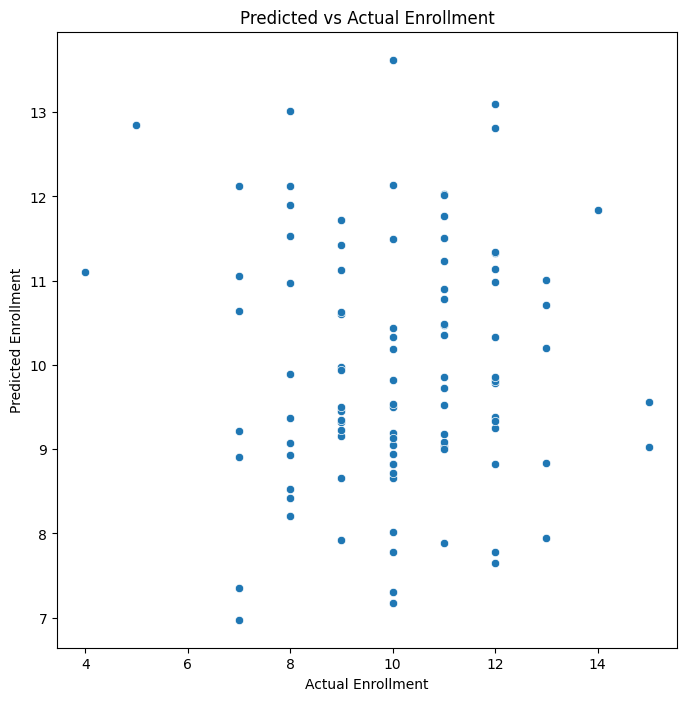

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize predicted versus actual enrollment on the test set
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Enrollment')
plt.ylabel('Predicted Enrollment')
plt.title('Predicted vs Actual Enrollment')
plt.show()


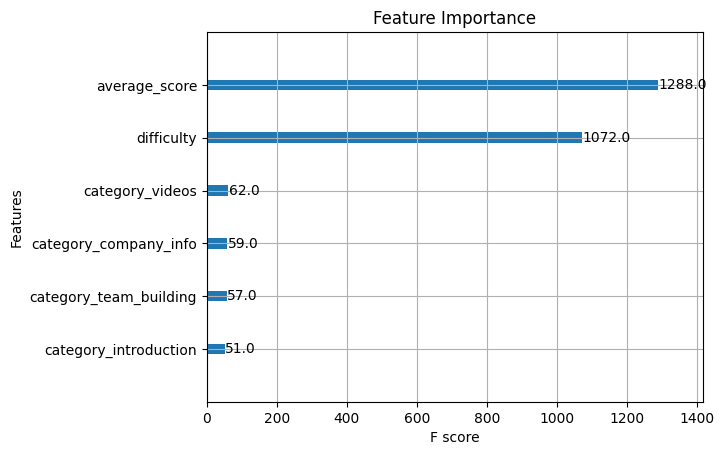

In [40]:
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()